# NYC Taxi EDA



### Load Python packages

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.preprocessing import LabelEncoder
from IPython.display import HTML
import folium
%matplotlib inline

### Read in the data files

In [2]:
train_df=pd.read_csv('./NYC_kaggle/train.csv')
test_df=pd.read_csv('./NYC_kaggle/test.csv')
sample_df=pd.read_csv('./NYC_kaggle/sample_submission.csv')

##### Data type check

In [3]:
print (train_df.info())
print (test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
id                    1458644 non-null object
vendor_id             1458644 non-null int64
pickup_datetime       1458644 non-null object
dropoff_datetime      1458644 non-null object
passenger_count       1458644 non-null int64
pickup_longitude      1458644 non-null float64
pickup_latitude       1458644 non-null float64
dropoff_longitude     1458644 non-null float64
dropoff_latitude      1458644 non-null float64
store_and_fwd_flag    1458644 non-null object
trip_duration         1458644 non-null int64
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625134 entries, 0 to 625133
Data columns (total 9 columns):
id                    625134 non-null object
vendor_id             625134 non-null int64
pickup_datetime       625134 non-null object
passenger_count       625134 non-null int64
pickup_longitude      6

**Actions Reuired**
- *Convert pickup and dropoff time columns to Datetime format*
- *Convert vendor_id to categorical feature*

### Data fields Dictionary 
- **id** - a unique identifier for each trip <br>
- **vendor_id** - a code indicating the provider associated with the trip record <br>
- **pickup_datetime** - date and time when the meter was engaged <br>
- **dropoff_datetime** - date and time when the meter was disengaged <br>
- **passenger_count** - the number of passengers in the vehicle (driver entered value) <br>
- **pickup_longitude** - the longitude where the meter was engaged <br>
- **pickup_latitude** - the latitude where the meter was engaged <br>
- **dropoff_longitude** - the longitude where the meter was disengaged <br>
- **dropoff_latitude** - the latitude where the meter was disengaged <br>
- **store_and_fwd_flag** - This flag indicates whether the trip record was held in vehicle memory <br>
before sending to the vendor because the vehicle did not have a connection to the server - Y=store <br>
and forward; N=not a store and forward trip <br>
- **trip_duration** - duration of the trip in seconds <br>

In [101]:
train_df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


In [102]:
test_df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
count,625134.000000,625134.000000,625134.000000,625134.000000,625134.000000,625134.000000
mean,1.534884,1.661765,-73.973614,40.750927,-73.973458,40.751816
std,0.498782,1.311293,0.073389,0.029848,0.072565,0.035824
min,1.000000,0.000000,-121.933128,37.389587,-121.933327,36.601322
25%,1.000000,1.000000,-73.991852,40.737392,-73.991318,40.736000
50%,2.000000,1.000000,-73.981743,40.754093,-73.979774,40.754543
75%,2.000000,2.000000,-73.967400,40.768394,-73.963013,40.769852
max,2.000000,9.000000,-69.248917,42.814938,-67.496796,48.857597


In [103]:
print (train_df['vendor_id'].value_counts())

print (test_df['vendor_id'].value_counts())

2    780302
1    678342
Name: vendor_id, dtype: int64
2    334374
1    290760
Name: vendor_id, dtype: int64


### Reformat Features

#### Convert Pickup and Dropoff time to datetime

In [8]:
## Format pickup and dropoff time column as datetime col
train_df['pickup_time']=pd.to_datetime(train_df['pickup_datetime'],yearfirst=True,format='%Y-%m-%d %H:%M:%S')

train_df['dropoff_time']=pd.to_datetime(train_df['dropoff_datetime'],yearfirst=True,format='%Y-%m-%d %H:%M:%S')

train_df.drop(['pickup_datetime','dropoff_datetime'],axis=1,inplace=True)

## Create hour and month column for both pickup and dropoff
pickhours=train_df['pickup_time'].dt.hour

drophours=train_df['dropoff_time'].dt.hour

pickmonths=train_df['pickup_time'].dt.month

dropmonths=train_df['dropoff_time'].dt.month

train_df['pick_hour']=pickhours

train_df['dropoff_hour']=drophours

train_df['pick_month']=pickmonths

train_df['dropoff_month']=dropmonths

In [9]:
## Categorize the vendor_id 

le=LabelEncoder()

le.fit(train_df['vendor_id'])

train_df['vendor_id']=le.transform(train_df['vendor_id'])

## Exploratory Data Analysis : with R packages ggplot2 and ggplotly 

** Distribution of trip_duration**

In [5]:
%load_ext rpy2.ipython

In [6]:
%R require(ggplot2); require(tidyr); require(plotly)

array([1], dtype=int32)

In [80]:
%%R -i train_df
p<- train_df %>% 
    
    ggplot(aes(x = trip_duration, group=vendor_id,fill = vendor_id)) +
    
    geom_histogram(position="identity",alpha=0.5) +
    
    scale_x_log10() +
    
    scale_y_sqrt()+
    
    labs(title = "Histogram of Trip durations",
    
         subtitle = "Vendorwise trip duration") +
    
    theme_bw()

pp<-ggplotly(p)

htmlwidgets::saveWidget(pp, "TripHist.html")

In [4]:
%%HTML

<iframe width="100%" height="550" src="TripHist.html"></iframe>

Fig. 1 <br>
Note the logarithmic x-axis and square-root y-axis.

<font color='red'> **We find:** <br>

-the majority of rides follow a rather smooth distribution that looks almost log-normal with a peak just short of 1000 seconds, 

i.e. about 27 minutes. <br>

-There are several suspiciously short rides with less than 10 seconds duration. <br>

-Additionally, there is a strange delta-shaped peak of trip_duration just before the 1e5 seconds mark and even a few way above 

it </font>

In [22]:
print ('Number of trips less than 10 seconds: {}'.format(len (train_df[train_df['trip_duration']<=10])))

print ('Number of trips more than 12 hours: {}' .format(len (train_df[train_df['trip_duration']>=43200])))

print ('Number of trips more than 24 hours: {}' .format(len (train_df[train_df['trip_duration']>=86400])))

Number of trips less than 10 seconds: 2166
Number of trips more than 12 hours: 1993
Number of trips more than 24 hours: 4


**Number of Pickup and Dropoffs over time**

In [10]:
%%R -i train_df

p1 <- ggplot(data=train_df,aes(x=pickup_time,col=vendor_id,fill=vendor_id)) +

      geom_histogram(fill = "red", bins = 120) +
  
      labs(title="Daily Pickup Volume",x = "Pickup dates")
p1<- p1+ facet_grid(vendor_id~.)+ theme(legend.position="none")

pp1<-ggplotly(p1)

htmlwidgets::saveWidget(pp1, "DailyPickups.html")

p2 <-  ggplot(data=train_df, aes(x=dropoff_time,col=vendor_id,fill=vendor_id)) +
  
      geom_histogram(fill = "blue", bins = 120) +
  
      labs(title="Daily Dropoff Volume",x = "Dropoff dates")

p2<- p2+facet_grid(vendor_id~.)+ theme(legend.position="none")

pp2<-ggplotly(p2)

htmlwidgets::saveWidget(pp2, "DailyDropoff.html")



In [12]:
%%HTML

<iframe width="100%" height="450" src="DailyPickups.html"></iframe>
<iframe width="100%" height="450" src="DailyDropoff.html"></iframe>

In [124]:
%R require(ggplot2); require(tidyr); require(plotly); require(reshape2)

array([1], dtype=int32)

In [13]:
%%R -i train_df
p3 <- ggplot(data=train_df,aes(x=pick_month, col=vendor_id,fill=vendor_id)) +

      geom_histogram(binwidth=1,colour="white") +
  
      labs(title="Vendorwise Monthly Pickup Volume",x = "Pickup dates")

p3<-p3+ facet_grid(vendor_id~.)+ theme(legend.position="none")

pp3<-ggplotly(p3)

htmlwidgets::saveWidget(pp3, "MonthlyPickups.html")

p4 <- ggplot(data=train_df,aes(x=dropoff_month,col=vendor_id,fill=vendor_id)) +

      geom_histogram(binwidth=1,colour="white") + 
  
      labs(title="Vendorwise Monthly Dropoff Volume",x = "Pickup dates")

p4<-p4+facet_grid(vendor_id~.)+ theme(legend.position="none")
pp4<-ggplotly(p4)

htmlwidgets::saveWidget(pp4, "MonthlyDropoffs.html")

In [14]:
%%HTML

<iframe width="80%" height="550" src="MonthlyPickups.html"></iframe>
<iframe width="80%" height="550" src="MonthlyDropoffs.html"></iframe>

In [48]:
geo_df=train_df[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','vendor_id']]

In [64]:
from sklearn.cluster import MiniBatchKMeans
kmeans_pick0 = MiniBatchKMeans(n_clusters=200, batch_size=1000).fit(geo_df[['pickup_latitude','pickup_longitude']][geo_df['vendor_id']==0])
kmeans_pick1= MiniBatchKMeans(n_clusters=200, batch_size=1000).fit(geo_df[['pickup_latitude','pickup_longitude']][geo_df['vendor_id']==1])


In [65]:

map_1 = folium.Map(location=[40.750920908391734, -73.97348630489282],
                   zoom_start=12)
for label0 in kmeans_pick0.cluster_centers_:
    folium.Marker(location=[label0][0],icon=folium.Icon(color='red')).add_to(map_1)
for label1 in kmeans_pick1.cluster_centers_:
    folium.Marker(location=[label1][0],icon=folium.Icon(color='blue')).add_to(map_1)

map_1


In [59]:
del map_1
del kmeans_pick0
del kmeans_pick1

In [62]:
kmeans_drop0 = MiniBatchKMeans(n_clusters=200, batch_size=1000).fit(geo_df[['dropoff_latitude','dropoff_longitude']][geo_df['vendor_id']==0])
kmeans_drop1= MiniBatchKMeans(n_clusters=200, batch_size=1000).fit(geo_df[['dropoff_latitude','dropoff_longitude']][geo_df['vendor_id']==1])

map_2 = folium.Map(location=[40.7517995149002, -73.9734159469458],
                   zoom_start=12)
for label0 in kmeans_drop0.cluster_centers_:
    folium.Marker(location=[label0][0],icon=folium.Icon(color='red')).add_to(map_2)
for label1 in kmeans_drop1.cluster_centers_:
    folium.Marker(location=[label1][0],icon=folium.Icon(color='blue')).add_to(map_2)

map_2

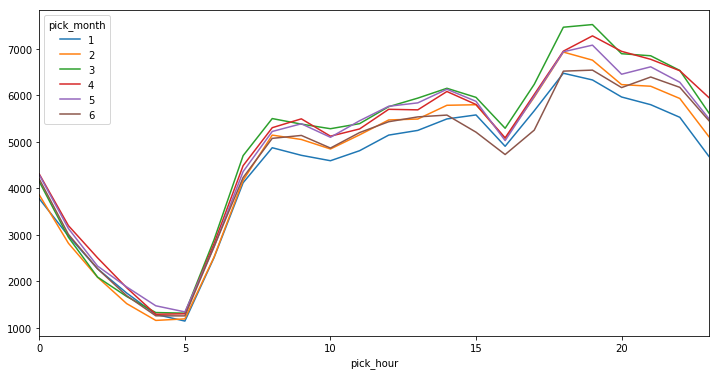

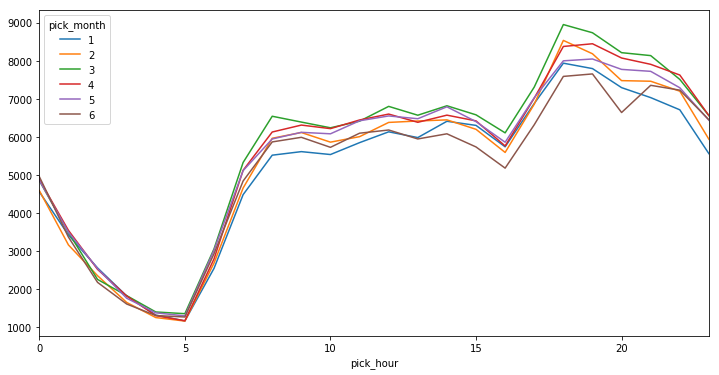

In [169]:
train_df[train_df['vendor_id']==0].pivot_table(values='id',index=('pick_hour'),columns='pick_month',aggfunc='count').plot(figsize=(12,6))
train_df[train_df['vendor_id']==1].pivot_table(values='id',index=('pick_hour'),columns='pick_month',aggfunc='count').plot(figsize=(12,6))

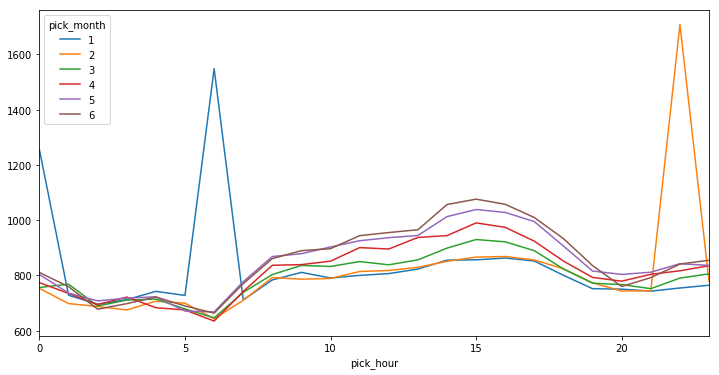

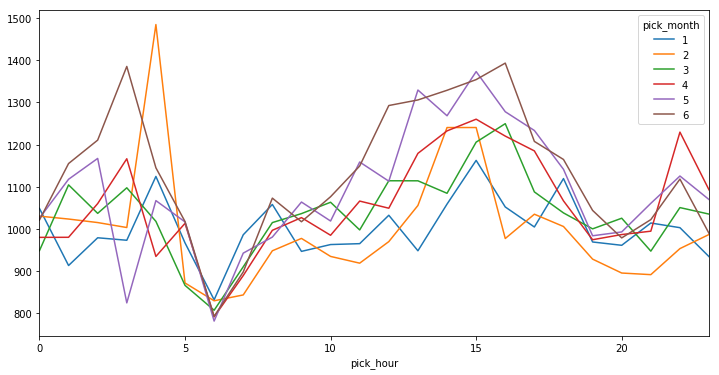

In [171]:
train_df[train_df['vendor_id']==0].pivot_table(values='trip_duration',index=('pick_hour'),columns='pick_month',aggfunc='mean').plot(figsize=(12,6))
train_df[train_df['vendor_id']==1].pivot_table(values='trip_duration',index=('pick_hour'),columns='pick_month',aggfunc='mean').plot(figsize=(12,6))